In [10]:
pwd

'C:\\Users\\SOHAM\\dataset_wec'

"""
In this NB, first of all i plotted how the independent feature varies with the dependent feature. Since it is a sinosuidal curve, i tried curve fitting with sin and cosine terms thier
combination and taylor series but the models were heavily underfitting. So, i tried a different approach by using ANN and i resulted with R2 of 93% at the end of this NB.

"""

In [11]:
import os
os.chdir("C:/Users/SOHAM/dataset_wec")

In [12]:
pwd

'C:\\Users\\SOHAM\\dataset_wec'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
 

In [14]:
test_data = pd.read_csv("test_data.csv")

In [15]:
test_data.head()

,w,x
0,-2.5,-20.640539
1,-2.5,21.636451
2,-2.5,-16.856414
3,-2.5,89.961916
4,-2.5,13.535599


In [16]:
train_data = pd.read_csv("train_data.csv")

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000000 entries, 0 to 99999999
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   w       float64
 1   x       float64
 2   y       float64
dtypes: float64(3)
memory usage: 2.2 GB


In [18]:
train_data.describe()

,w,x,y
count,1.000000e+08,1.000000e+08,1.000000e+08
mean,0.000000e+00,4.791858e-04,1.496772e-04
std,1.658312e+00,5.773173e+00,7.109031e-01
min,-2.500000e+00,-1.000000e+01,-1.249830e+00
25%,-1.500000e+00,-4.998248e+00,-7.086739e-01
50%,0.000000e+00,4.332894e-04,3.197931e-04
75%,1.500000e+00,4.999903e+00,7.089603e-01
max,2.500000e+00,1.000000e+01,1.259282e+00


In [19]:
train_data.isnull().sum()

w    0
x    0
y    0
dtype: int64

In [20]:


sample = train_data.sample(100000)   

 


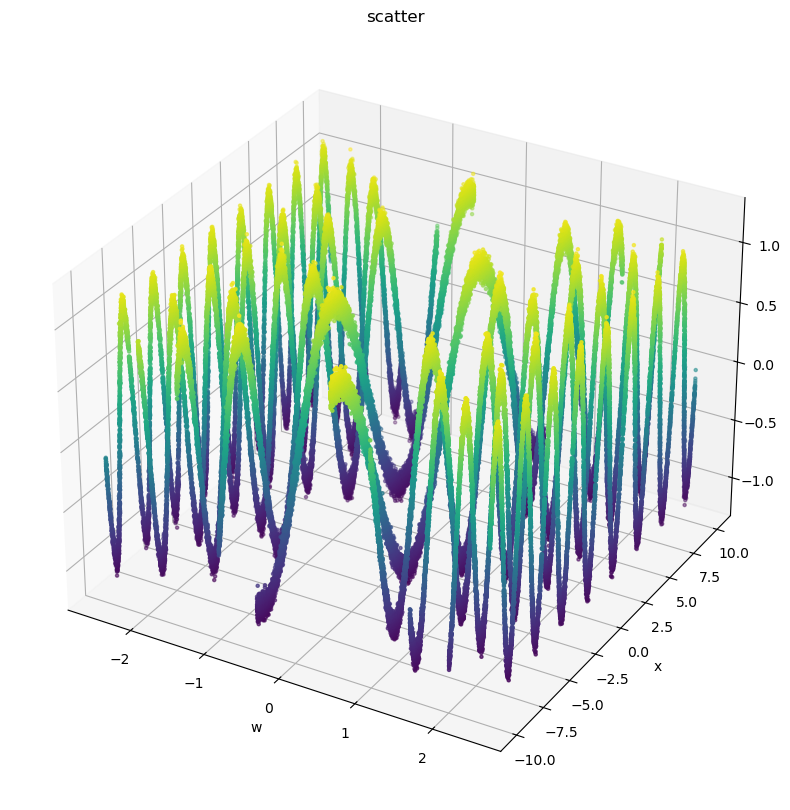

In [21]:
from mpl_toolkits.mplot3d import Axes3D


sample = train_data.sample(100000)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample['w'], sample['x'], sample['y'], c=sample['y'], cmap='viridis', s=5)
ax.set_xlabel('w')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('scatter')
plt.show()


In [22]:
from scipy.optimize import curve_fit
x = np.array(sample.x)
w = np.array(sample.w)
y = np.array(sample.y)
var = (x, w)

def model_f(var, A, B, a1, b1, c, a2, b2, d):
    x, w = var
    return A * np.sin(a1 * x + b1 * w + c) + B * np.cos(a2 * x + b2 * w + d)



In [23]:
 
A_guess = (y.max() - y.min()) / 2
B_guess = A_guess
a1_guess = 1
b1_guess = 1
c_guess = 0
a2_guess = 1
b2_guess = 1
d_guess = 0

ig = [A_guess, B_guess, a1_guess, b1_guess, c_guess, a2_guess, b2_guess, d_guess]

popt, pcov = curve_fit(model_f, var, y, p0=ig)


In [24]:
from sklearn.metrics import r2_score
y_pred = model_f(var, *popt)
r2 = r2_score(y, y_pred)


In [25]:
r2 * 100
#the model is under fitting

1.7711229003037898

In [26]:
y_pred = model_f(var, *popt)  
residuals = y - y_pred

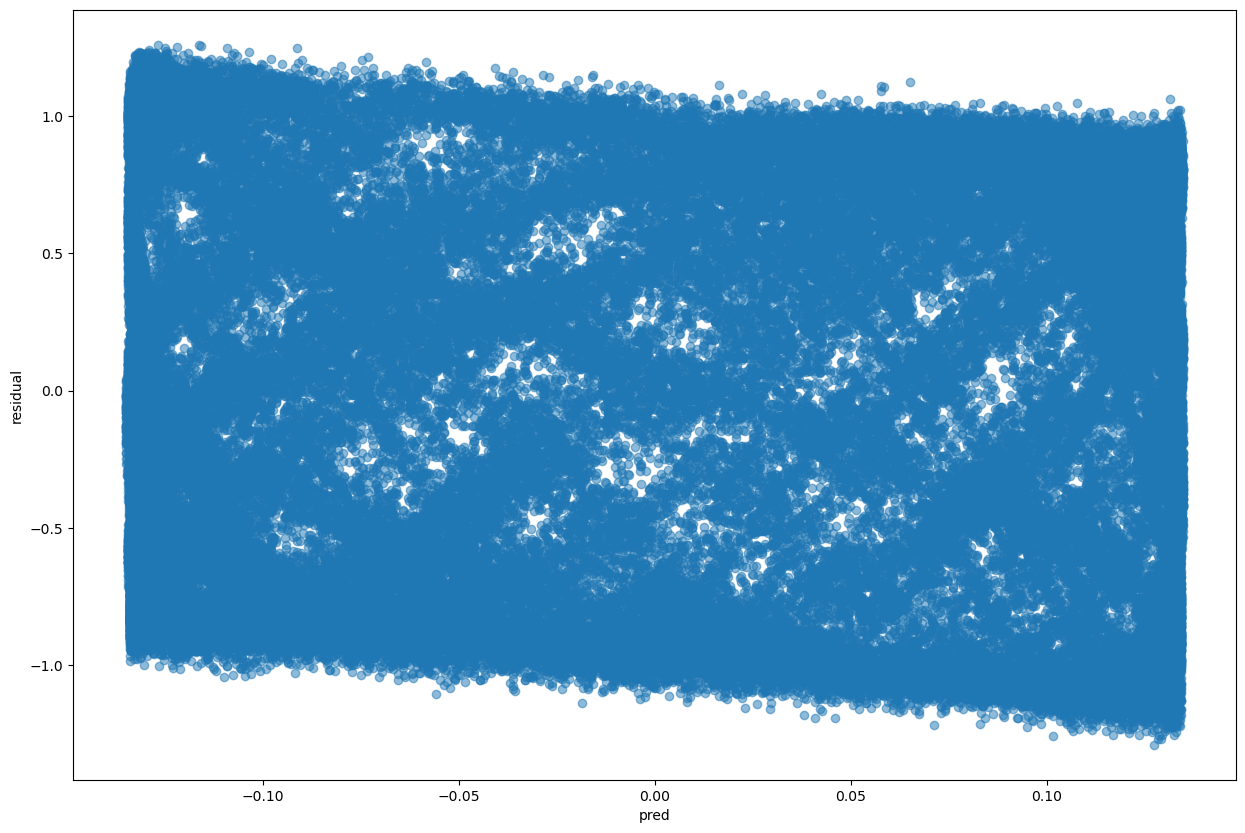

In [27]:

plt.figure(figsize=(15,10))
plt.scatter(y_pred, residuals, alpha=0.5)
   
plt.xlabel('pred')
plt.ylabel('residual')
 
plt.show()


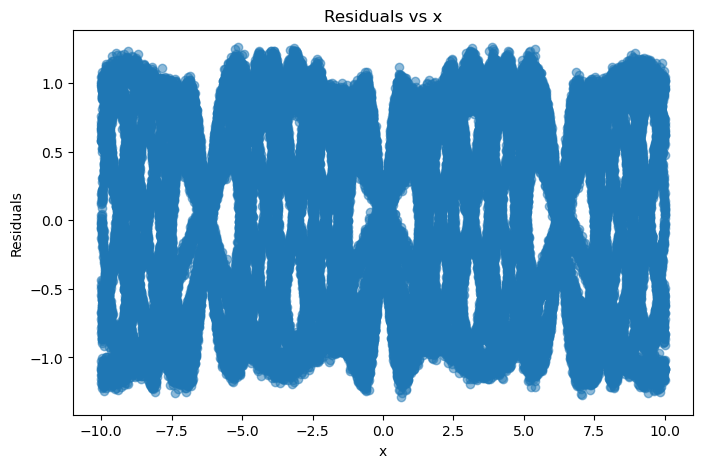

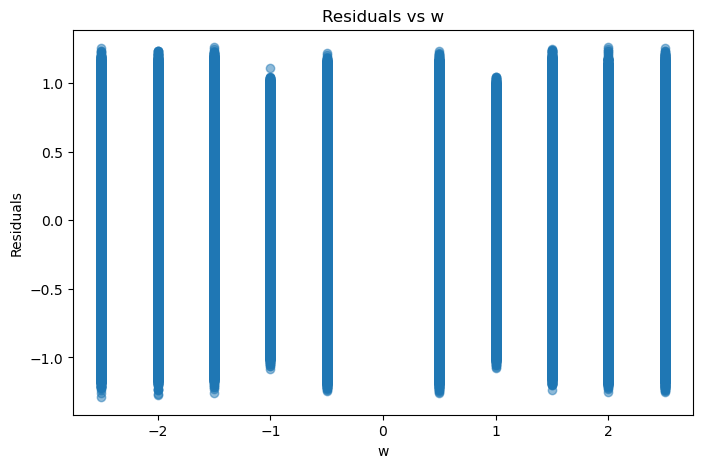

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(var[0], residuals, alpha=0.5)
 
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals vs x')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(var[1], residuals, alpha=0.5)

plt.xlabel('w')
plt.ylabel('Residuals')
plt.title('Residuals vs w')
plt.show()


In [29]:
# now lets try the product of two functions

In [30]:
def model_f(var, A, B, a1, b1, c, a2, b2, d):
    x, w = var
    return (A*np.sin(a1*x+b1*w+c)) *(B*np.cos(a2*x +b2*w+d))

A_guess = (y.max() - y.min()) / 2
B_guess = A_guess
a1_guess = 1
b1_guess = 1
c_guess = 1
a2_guess = 1
b2_guess = 1
d_guess = 1

ig = [A_guess, B_guess, a1_guess, b1_guess, c_guess, a2_guess, b2_guess, d_guess]

popt, pcov = curve_fit(model_f, var, y, p0=ig)

from sklearn.metrics import r2_score
y_pred = model_f(var, *popt)
r2 = r2_score(y, y_pred)

print(r2 * 100)

3.138704893496891


In [31]:
def model_f(var, A, B, a1, b1, c, a2, b2, d):
    x, w = var
    sin_arg = a1 * x + b1 * w + c
    cos_arg = a2 * x + b2 * w + d
    return (A * np.sin(sin_arg)) + (B * np.cos(cos_arg))
 
A_guess = (y.max() - y.min()) / 2
B_guess = A_guess
a1_guess = 1
b1_guess = 1
c_guess = 0
a2_guess = 1
b2_guess = 1
d_guess = 0

ig = [A_guess, B_guess, a1_guess, b1_guess, c_guess, a2_guess, b2_guess, d_guess]

 
popt, pcov = curve_fit(model_f, (x, w), y, p0=ig, maxfev=10000)
 
y_pred = model_f((x, w), *popt)
r2 = r2_score(y, y_pred)
print(r2 * 100)


1.7711229003037898


In [32]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

 
def model_f(var, A1, a1, b1, c1, A2, a2, b2, c2, B1, d1, e1, f1, B2, d2, e2, f2):
    x, w = var
    term1 = A1 * np.sin(a1 * x + b1 * w + c1)
    term2 = A2 * np.sin(a2 * x + b2 * w + c2)
    term3 = B1 * np.cos(d1 * x + e1 * w + f1)
    term4 = B2 * np.cos(d2 * x + e2 * w + f2)
    return term1 + term2 + term3 + term4

 
A1_guess = (y.max() - y.min()) / 4
a1_guess = 1
b1_guess = 1
c1_guess = 0

A2_guess = A1_guess
a2_guess = 2
b2_guess = 1
c2_guess = 0

B1_guess = A1_guess
d1_guess = 1
e1_guess = 2
f1_guess = np.pi/4

B2_guess = A1_guess
d2_guess = 2
e2_guess = 2
f2_guess = np.pi/4

initial_guess = [A1_guess, a1_guess, b1_guess, c1_guess, 
                 A2_guess, a2_guess, b2_guess, c2_guess,
                 B1_guess, d1_guess, e1_guess, f1_guess,
                 B2_guess, d2_guess, e2_guess, f2_guess]


popt, pcov = curve_fit(model_f, (x, w), y, p0=initial_guess, maxfev=20000)

 
y_pred = model_f((x, w), *popt)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2*100:.2f}%")


R-squared: 9.32%


In [33]:


 
def model_f(var, A1, a1, b1, c1, A2, a2, b2, c2, B1, d1, e1, f1, B2, d2, e2, f2):
    x, w = var
    term1 = A1 * np.sin(a1 * x + b1 * w + c1)
    term2 = A2 * np.sin(a2 * x + b2 * w + c2)
    term3 = B1 * np.cos(d1 * x + e1 * w + f1)
    term4 = B2 * np.cos(d2 * x + e2 * w + f2)
    return term1 + term2 + term3 + term4
 
A1_guess = (y.max() - y.min()) / 4
a1_guess = 1
b1_guess = 1
c1_guess = 0

A2_guess = A1_guess
a2_guess = 2
b2_guess = 1
c2_guess = 0

B1_guess = A1_guess
d1_guess = 1
e1_guess = 2
f1_guess = np.pi/4

B2_guess = A1_guess
d2_guess = 2
e2_guess = 2
f2_guess = np.pi/4

initial_guess = [A1_guess, a1_guess, b1_guess, c1_guess, 
                 A2_guess, a2_guess, b2_guess, c2_guess,
                 B1_guess, d1_guess, e1_guess, f1_guess,
                 B2_guess, d2_guess, e2_guess, f2_guess]

popt, pcov = curve_fit(model_f, (x, w), y, p0=initial_guess, maxfev=20000)

 
y_pred = model_f((x, w), *popt)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2*100:.2f}%")


R-squared: 9.32%


In [35]:
print(y.min(),y.max())



-1.1621530324816234 1.1955464914764975


In [39]:


target_col = 'y'  
feat = train_data.drop(columns=["y"]).values
target = train_data[target_col].values

 
size = 50000
indice = np.random.choice(len(feat), size=size, replace=False)
x_sample = feat[indice]
y_sample = target[indice]


kf = KFold(n_splits=5, shuffle=True)
r2_scores = []


In [40]:
for fold, (train_idx, val_idx) in enumerate(kf.split(x_sample)):
    print(f"training fold {fold+1}")
    
    x_train, x_val = x_sample[train_idx], x_sample[val_idx]
    y_train, y_val = y_sample[train_idx], y_sample[val_idx]
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_val = scaler.transform(x_val)
    
    model = Sequential([
        Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
        BatchNormalization(),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1, activation="linear"),
    ])

    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=300,
        batch_size=128,
        callbacks=[early_stop],
        verbose=2,
    )
    
    y_pred = model.predict(x_val)
    fold_r2 = r2_score(y_val, y_pred)
    print(f"fold {fold+1} r^2: {fold_r2:.4f}")
    r2_scores.append(fold_r2)

 


training fold 1


c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
313/313 - 2s - 7ms/step - loss: 0.4758 - mae: 0.5964 - val_loss: 0.4686 - val_mae: 0.6133
Epoch 2/300
313/313 - 0s - 2ms/step - loss: 0.3832 - mae: 0.5257 - val_loss: 0.3394 - val_mae: 0.4885
Epoch 3/300
313/313 - 0s - 2ms/step - loss: 0.3309 - mae: 0.4760 - val_loss: 0.2748 - val_mae: 0.4232
Epoch 4/300
313/313 - 0s - 2ms/step - loss: 0.2912 - mae: 0.4377 - val_loss: 0.2283 - val_mae: 0.3661
Epoch 5/300
313/313 - 1s - 3ms/step - loss: 0.2613 - mae: 0.4069 - val_loss: 0.2168 - val_mae: 0.3455
Epoch 6/300
313/313 - 0s - 1ms/step - loss: 0.2429 - mae: 0.3883 - val_loss: 0.1856 - val_mae: 0.3131
Epoch 7/300
313/313 - 0s - 2ms/step - loss: 0.2337 - mae: 0.3791 - val_loss: 0.1922 - val_mae: 0.3149
Epoch 8/300
313/313 - 1s - 2ms/step - loss: 0.2235 - mae: 0.3679 - val_loss: 0.1760 - val_mae: 0.3016
Epoch 9/300
313/313 - 1s - 2ms/step - loss: 0.2126 - mae: 0.3553 - val_loss: 0.1756 - val_mae: 0.3087
Epoch 10/300
313/313 - 1s - 2ms/step - loss: 0.2054 - mae: 0.3480 - val_loss: 0.15

c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 2s - 6ms/step - loss: 0.4602 - mae: 0.5860 - val_loss: 0.4603 - val_mae: 0.6083
Epoch 2/300
313/313 - 1s - 2ms/step - loss: 0.3550 - mae: 0.4995 - val_loss: 0.3033 - val_mae: 0.4559
Epoch 3/300
313/313 - 1s - 2ms/step - loss: 0.3026 - mae: 0.4482 - val_loss: 0.2348 - val_mae: 0.3712
Epoch 4/300
313/313 - 1s - 2ms/step - loss: 0.2758 - mae: 0.4215 - val_loss: 0.2325 - val_mae: 0.3720
Epoch 5/300
313/313 - 0s - 2ms/step - loss: 0.2574 - mae: 0.4032 - val_loss: 0.2030 - val_mae: 0.3424
Epoch 6/300
313/313 - 0s - 1ms/step - loss: 0.2449 - mae: 0.3898 - val_loss: 0.2018 - val_mae: 0.3368
Epoch 7/300
313/313 - 0s - 1ms/step - loss: 0.2387 - mae: 0.3839 - val_loss: 0.1932 - val_mae: 0.3225
Epoch 8/300
313/313 - 0s - 1ms/step - loss: 0.2214 - mae: 0.3653 - val_loss: 0.1732 - val_mae: 0.2981
Epoch 9/300
313/313 - 0s - 1ms/step - loss: 0.2149 - mae: 0.3585 - val_loss: 0.1623 - val_mae: 0.2780
Epoch 10/300
313/313 - 0s - 1ms/step - loss: 0.2083 - mae: 0.3515 - val_loss: 0.1596 - val_mae

c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 2s - 6ms/step - loss: 0.4652 - mae: 0.5897 - val_loss: 0.4645 - val_mae: 0.6109
Epoch 2/300
313/313 - 0s - 2ms/step - loss: 0.3630 - mae: 0.5070 - val_loss: 0.3191 - val_mae: 0.4821
Epoch 3/300
313/313 - 0s - 2ms/step - loss: 0.3093 - mae: 0.4549 - val_loss: 0.2458 - val_mae: 0.3802
Epoch 4/300
313/313 - 0s - 2ms/step - loss: 0.2847 - mae: 0.4311 - val_loss: 0.2216 - val_mae: 0.3557
Epoch 5/300
313/313 - 0s - 2ms/step - loss: 0.2650 - mae: 0.4114 - val_loss: 0.2125 - val_mae: 0.3611
Epoch 6/300
313/313 - 1s - 2ms/step - loss: 0.2461 - mae: 0.3913 - val_loss: 0.1779 - val_mae: 0.3116
Epoch 7/300
313/313 - 1s - 2ms/step - loss: 0.2339 - mae: 0.3784 - val_loss: 0.1835 - val_mae: 0.3162
Epoch 8/300
313/313 - 0s - 2ms/step - loss: 0.2242 - mae: 0.3688 - val_loss: 0.1831 - val_mae: 0.3171
Epoch 9/300
313/313 - 1s - 2ms/step - loss: 0.2155 - mae: 0.3599 - val_loss: 0.1730 - val_mae: 0.3131
Epoch 10/300
313/313 - 0s - 2ms/step - loss: 0.2050 - mae: 0.3491 - val_loss: 0.1535 - val_mae

c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 2s - 6ms/step - loss: 0.4756 - mae: 0.5995 - val_loss: 0.4696 - val_mae: 0.6167
Epoch 2/300
313/313 - 0s - 1ms/step - loss: 0.3809 - mae: 0.5243 - val_loss: 0.3246 - val_mae: 0.4798
Epoch 3/300
313/313 - 1s - 2ms/step - loss: 0.3277 - mae: 0.4750 - val_loss: 0.2550 - val_mae: 0.4010
Epoch 4/300
313/313 - 0s - 2ms/step - loss: 0.2950 - mae: 0.4436 - val_loss: 0.2336 - val_mae: 0.3729
Epoch 5/300
313/313 - 1s - 2ms/step - loss: 0.2699 - mae: 0.4174 - val_loss: 0.2287 - val_mae: 0.3636
Epoch 6/300
313/313 - 0s - 1ms/step - loss: 0.2599 - mae: 0.4062 - val_loss: 0.2094 - val_mae: 0.3471
Epoch 7/300
313/313 - 0s - 1ms/step - loss: 0.2463 - mae: 0.3920 - val_loss: 0.1983 - val_mae: 0.3168
Epoch 8/300
313/313 - 0s - 2ms/step - loss: 0.2353 - mae: 0.3804 - val_loss: 0.1826 - val_mae: 0.3068
Epoch 9/300
313/313 - 1s - 2ms/step - loss: 0.2244 - mae: 0.3681 - val_loss: 0.1968 - val_mae: 0.3416
Epoch 10/300
313/313 - 1s - 2ms/step - loss: 0.2139 - mae: 0.3582 - val_loss: 0.1789 - val_mae

c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 2s - 6ms/step - loss: 0.4608 - mae: 0.5893 - val_loss: 0.4540 - val_mae: 0.6035
Epoch 2/300
313/313 - 0s - 1ms/step - loss: 0.3811 - mae: 0.5227 - val_loss: 0.3275 - val_mae: 0.4791
Epoch 3/300
313/313 - 0s - 2ms/step - loss: 0.3323 - mae: 0.4772 - val_loss: 0.2782 - val_mae: 0.4355
Epoch 4/300
313/313 - 1s - 2ms/step - loss: 0.2975 - mae: 0.4430 - val_loss: 0.2328 - val_mae: 0.3731
Epoch 5/300
313/313 - 0s - 2ms/step - loss: 0.2676 - mae: 0.4114 - val_loss: 0.2067 - val_mae: 0.3333
Epoch 6/300
313/313 - 1s - 2ms/step - loss: 0.2514 - mae: 0.3954 - val_loss: 0.1944 - val_mae: 0.3180
Epoch 7/300
313/313 - 0s - 1ms/step - loss: 0.2408 - mae: 0.3841 - val_loss: 0.1873 - val_mae: 0.3244
Epoch 8/300
313/313 - 1s - 2ms/step - loss: 0.2280 - mae: 0.3706 - val_loss: 0.1729 - val_mae: 0.3025
Epoch 9/300
313/313 - 1s - 2ms/step - loss: 0.2152 - mae: 0.3577 - val_loss: 0.1590 - val_mae: 0.2825
Epoch 10/300
313/313 - 1s - 2ms/step - loss: 0.2078 - mae: 0.3507 - val_loss: 0.1499 - val_mae

In [41]:
print(f"avg r2 score: {np.mean(r2_scores):.4f}")

avg r2 score: 0.9241


In [43]:

scaler = StandardScaler()
x_full_train = scaler.fit_transform(x_sample)


final_model = Sequential([
    Dense(128, activation="relu", input_shape=(x_full_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1, activation="linear"),
])

final_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

final_model.fit(
    x_full_train, y_sample,
    epochs=350,
    batch_size=128,
    callbacks=[early_stop],
    verbose=2,
)





Epoch 1/350


c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 - 2s - 4ms/step - loss: 0.4358 - mae: 0.5651
Epoch 2/350


c:\Users\SOHAM\condaaa\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


391/391 - 0s - 1ms/step - loss: 0.3336 - mae: 0.4771
Epoch 3/350
391/391 - 0s - 1ms/step - loss: 0.2857 - mae: 0.4325
Epoch 4/350
391/391 - 0s - 1ms/step - loss: 0.2562 - mae: 0.4028
Epoch 5/350
391/391 - 0s - 1ms/step - loss: 0.2383 - mae: 0.3843
Epoch 6/350
391/391 - 0s - 1ms/step - loss: 0.2254 - mae: 0.3700
Epoch 7/350
391/391 - 0s - 1ms/step - loss: 0.2101 - mae: 0.3536
Epoch 8/350
391/391 - 1s - 2ms/step - loss: 0.2026 - mae: 0.3458
Epoch 9/350
391/391 - 0s - 1ms/step - loss: 0.1905 - mae: 0.3321
Epoch 10/350
391/391 - 0s - 1ms/step - loss: 0.1898 - mae: 0.3306
Epoch 11/350
391/391 - 0s - 1ms/step - loss: 0.1748 - mae: 0.3146
Epoch 12/350
391/391 - 0s - 1ms/step - loss: 0.1734 - mae: 0.3135
Epoch 13/350
391/391 - 0s - 1ms/step - loss: 0.1654 - mae: 0.3037
Epoch 14/350
391/391 - 0s - 1ms/step - loss: 0.1622 - mae: 0.3005
Epoch 15/350
391/391 - 0s - 1ms/step - loss: 0.1570 - mae: 0.2938
Epoch 16/350
391/391 - 0s - 1ms/step - loss: 0.1512 - mae: 0.2878
Epoch 17/350
391/391 - 0s - 1m

In [44]:

x_test_scaled = scaler.transform(test_data[:10000])
test_predictions = final_model.predict(x_test_scaled)

print(test_predictions)


308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step

c:\Users\SOHAM\condaaa\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
[[-1.677915 ]
 [-1.9785577]
 [-1.189612 ]
 ...
 [-6.8750114]
 [-5.5042033]
 [-4.367415 ]]


In [45]:
test_predictions[:10]

array([[-1.677915  ],
       [-1.9785577 ],
       [-1.189612  ],
       [-8.691476  ],
       [-0.40258452],
       [-3.8647346 ],
       [-9.730996  ],
       [-3.482262  ],
       [-3.746841  ],
       [-2.8817186 ]], dtype=float32)